In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import random

import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, SpatialDropout2D, BatchNormalization, Flatten, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
labels = os.listdir('../input/natural-images/natural_images')
print(labels)

['fruit', 'flower', 'person', 'car', 'motorbike', 'airplane', 'dog', 'cat']


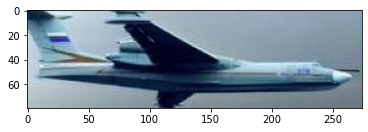

In [3]:
DATADIR = "../input/natural-images/natural_images"
CATEGORIES = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person'] 

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)    # takes us to the directory where labels are located
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
img_array.shape

(80, 274, 3)

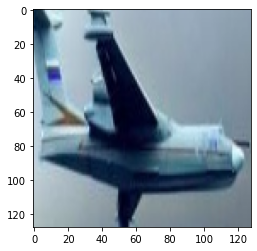

In [5]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resizing the images
plt.imshow(new_array)
plt.show()

Combining both of the above step

In [6]:
train_data = []


def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)    # takes us to the directory where labels are located
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resizing the images
                train_data.append([new_array, class_num])
                
            except Exception as e:
                pass
            
create_train_data()

In [7]:
print(len(train_data))

6899


In [8]:
random.shuffle(train_data)   # shuffle the train-data 

In [9]:
for sample in train_data[:5]:           # to check the labels
    print(sample[1])

1
7
1
1
1


In [10]:
X = []        # for features
Y = []        # for labels

In [11]:
for features, labels in train_data:
    X.append(features)
    Y.append(labels)
    
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)

In [12]:
X.shape

(6899, 128, 128, 3)

In [13]:
le = LabelEncoder()

In [14]:
Y = le.fit_transform(Y)
Y = keras.utils.to_categorical(Y, num_classes = 8)
y = np.array(Y)

In [15]:
y.shape

(6899, 8)

In [16]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
X = X / 255

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4484, 128, 128, 3), (2415, 128, 128, 3), (4484, 8), (2415, 8))

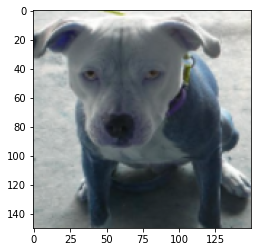

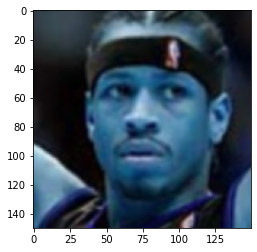

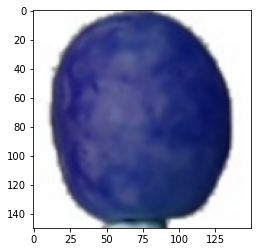

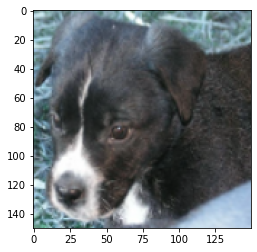

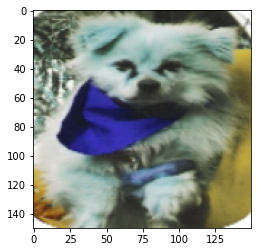

In [20]:
for i in range(0,5):
  IMG_SIZE = 150
  new_imgs = cv2.resize(X_train[i], (IMG_SIZE, IMG_SIZE))
  plt.imshow(new_imgs)
  plt.show()

In [21]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same',activation = 'relu', input_shape = (128,128,3), name = 'Conv2D_1'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same',activation = 'relu', name = 'Conv2D_2'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(filters = 96, kernel_size = (5,5), padding = 'same', activation = 'relu', name = 'Conv2D_3'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'same', activation = 'relu', name = 'Conv2D_4'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))
model.add(SpatialDropout2D(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(8, activation = 'softmax'))

model.compile(loss = keras.losses.CategoricalCrossentropy(),
             optimizer = keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = [keras.metrics.CategoricalAccuracy()])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 42, 42, 32)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 42, 42, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 42, 42, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0

In [23]:
datagen = ImageDataGenerator(
    
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range= 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False    # randomly flip images
) 

datagen.fit(X_train)

In [24]:
model_history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 100),
                                    epochs = 10, validation_data = (X_test, y_test),
                                    verbose = 1, steps_per_epoch=X_train.shape[0] // 100)

Epoch 1/10
44/44 [==============================] - 17s 381ms/step - loss: 1.4127 - categorical_accuracy: 0.5098 - val_loss: 1.9945 - val_categorical_accuracy: 0.3706
Epoch 2/10
44/44 [==============================] - 17s 395ms/step - loss: 0.9667 - categorical_accuracy: 0.6551 - val_loss: 2.1986 - val_categorical_accuracy: 0.3814
Epoch 3/10
44/44 [==============================] - 17s 380ms/step - loss: 0.8205 - categorical_accuracy: 0.7094 - val_loss: 2.9390 - val_categorical_accuracy: 0.2522
Epoch 4/10
44/44 [==============================] - 16s 369ms/step - loss: 0.7629 - categorical_accuracy: 0.7208 - val_loss: 2.5323 - val_categorical_accuracy: 0.3983
Epoch 5/10
44/44 [==============================] - 17s 387ms/step - loss: 0.7067 - categorical_accuracy: 0.7516 - val_loss: 2.1099 - val_categorical_accuracy: 0.3917
Epoch 6/10
44/44 [==============================] - 16s 370ms/step - loss: 0.6317 - categorical_accuracy: 0.7817 - val_loss: 1.3121 - val_categorical_accuracy: 0.545

In [25]:
model_eval = model.evaluate(X_test, y_test)

print("Loss = ", model_eval[0])
print("Test accuracy = ", model_eval[1]*100)

76/76 [==============================] - 0s 6ms/step - loss: 0.3661 - categorical_accuracy: 0.8621
Loss =  0.3660627603530884
Test accuracy =  86.21118068695068


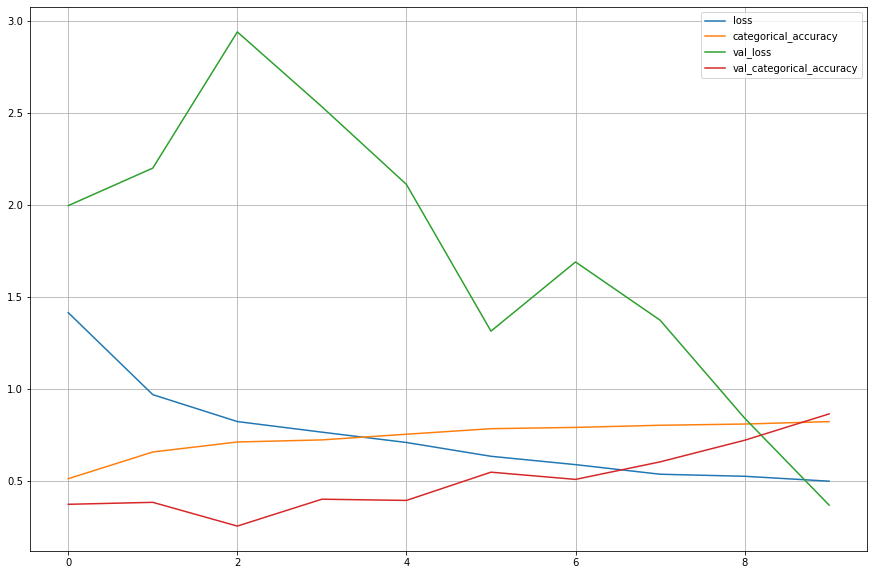

In [26]:
pd.DataFrame(model_history.history).plot(figsize = (15,10))
plt.gca()
plt.grid(True)
plt.show()

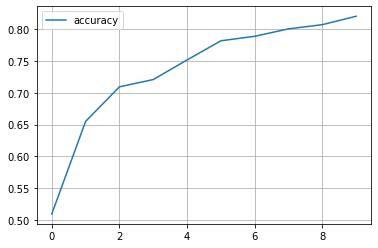

In [27]:
accuracy = model_history.history['categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label = 'accuracy')
plt.legend()
plt.grid(True)

In [29]:
y_predict = model.predict_classes(X_test)
y_predict

array([6, 1, 2, ..., 4, 1, 2])

In [33]:
y_test = y_test.argmax(1)
y_test

array([6, 1, 3, ..., 4, 1, 2])